# Task 0 — Environment & account


In [104]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [105]:
%pip install "qiskit[all]~=2.1" "qiskit-ibm-runtime~=0.40"

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [106]:
%pip install qiskit_ibm_runtime

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [107]:
from qiskit_ibm_runtime import QiskitRuntimeService

# >>> Edit these two lines:
#TOKEN = "MWZ1LaXEw2yEimK7gS0p7DPXzFExPBsQ5Lhhs1B5JBRx"
#INSTANCE = "crn:v1:bluemix:public:quantum-computing:us-east:...:..."
TOKEN = "9mPcwvsrDrVvwzqWjI9ghv_cPSa3zmSYgF7t6I8KJiDW"
INSTANCE = "crn:v1:bluemix:public:quantum-computing:us-east:a/9265c02cf78442c18d43b7eed70da219:f9880051-6766-4d2c-8353-4d188017ec81::"

# Safety check to avoid empty tokens
# if not TOKEN or TOKEN.strip() in {"", "MWZ1LaXEw2yEimK7gS0p7DPXzFExPBsQ5Lhhs1B5JBRx"}:
#     raise ValueError("Please paste your IBM Quantum API key into TOKEN (between quotes) and run again.")

# Create the service directly (no saved account needed)
service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=TOKEN.strip(),
    instance=(INSTANCE.strip() if isinstance(INSTANCE, str) and INSTANCE.strip() else None),
)

# Quick sanity check
backends = service.backends(operational=True, simulator=False)
print("OK. Found", len(backends), "real backends. Example:", [b.name for b in backends[:3]])

qiskit_runtime_service._discover_account:WARNING:2025-10-09 19:25:13,208: Loading account with the given token. A saved account will not be used.


OK. Found 2 real backends. Example: ['ibm_brisbane', 'ibm_torino']


In [108]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=TOKEN.strip(),
    instance=(INSTANCE.strip() if isinstance(INSTANCE, str) and INSTANCE.strip() else None),
    set_as_default=True,
    overwrite=True,
)
print("Saved default account for this runtime.")

Saved default account for this runtime.


In [109]:
# --- Imports ---
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler


# --- Connect (assumes Step 5 is done) ---
service = QiskitRuntimeService()


# Pick an available real backend (not a simulator)
backend = service.least_busy(operational=True, simulator=False)
print("Using backend:", backend.name)


# --- Build Bell circuit ---
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# --- Transpile to the device's ISA ---
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

# --- Run with the Sampler V2 primitive ---
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024
job = sampler.run([isa_bell])
print("Job ID:", job.job_id())

# --- Get results ---
result = job.result()
pub_result = result[0]
print("Counts (meas register):", pub_result.data.meas.get_counts())


management.get:WARNING:2025-10-09 19:25:17,606: Loading default saved account


Using backend: ibm_torino
Job ID: d3jv00o3qtks7389aaag
Counts (meas register): {'11': 413, '00': 468, '01': 52, '10': 91}


In [110]:
%pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [111]:
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

sampler = AerSampler()
job = sampler.run([bell])
print(job.result()[0].data.meas.get_counts())


{'00': 526, '11': 498}


In [112]:
import qiskit, qiskit_ibm_runtime, qiskit_aer
print(qiskit.__version__, qiskit_ibm_runtime.__version__, qiskit_aer.__version__)

2.2.1 0.42.0 0.17.2


# Task 1 — IBM Quantum device survey

In [113]:
cands = service.backends(simulator=False, operational=True, min_num_qubits=6)
for b in cands: print(b.name, b.num_qubits)

A = service.least_busy(simulator=False, operational=True, min_num_qubits=6)
B = next(b for b in cands if b.name != A.name)
A, B

ibm_brisbane 127
ibm_torino 133


(<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>)

In [114]:
cfgA = A.configuration(); cfgB = B.configuration()
print("A basis_gates:", cfgA.basis_gates)
print("B basis_gates:", cfgB.basis_gates)
cmapA = A.coupling_map; cmapB = B.coupling_map

A basis_gates: ['cz', 'id', 'rz', 'sx', 'x']
B basis_gates: ['ecr', 'id', 'rz', 'sx', 'x']


## Coupling map for A

In [115]:
import sys
print(sys.executable)


C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe


In [116]:
! "C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe" -m pip install matplotlib

You should consider upgrading via the 'C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py


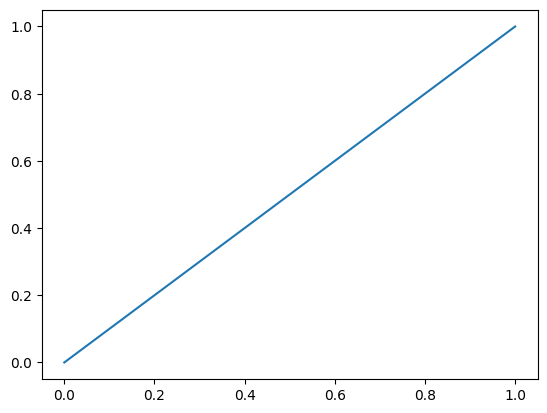

C:\Users\Bassem T\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\__init__.py


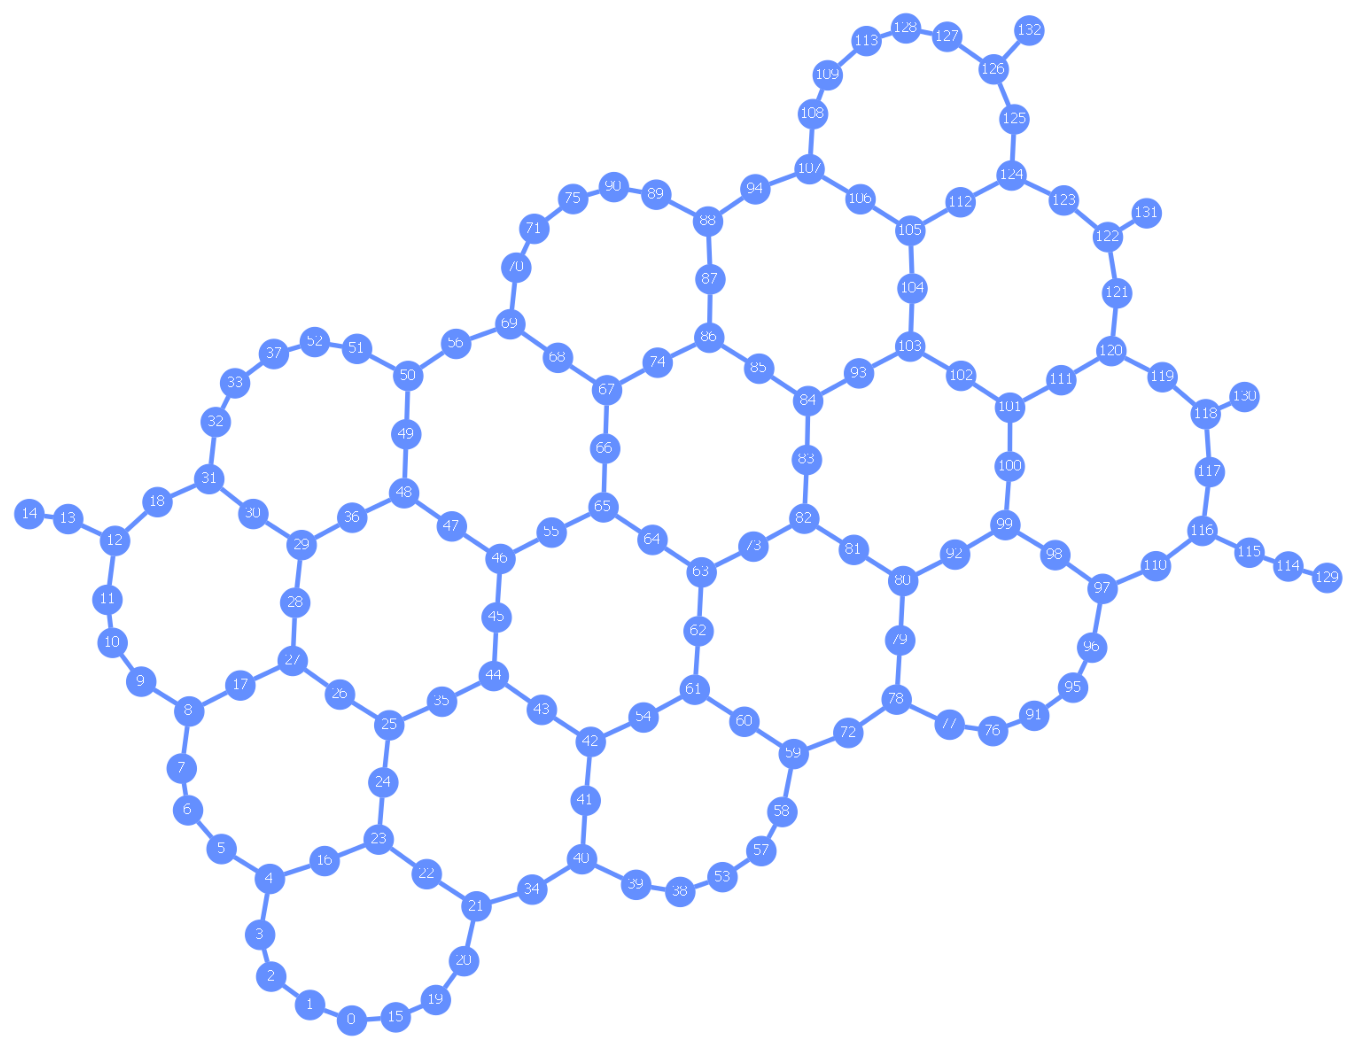

In [117]:
import matplotlib
print(matplotlib.__file__)
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1])
plt.show()


import qiskit
print(qiskit.__file__)


from qiskit.visualization import plot_coupling_map
plot_coupling_map(A.num_qubits, None, cmapA.get_edges())


## Coupling map for B

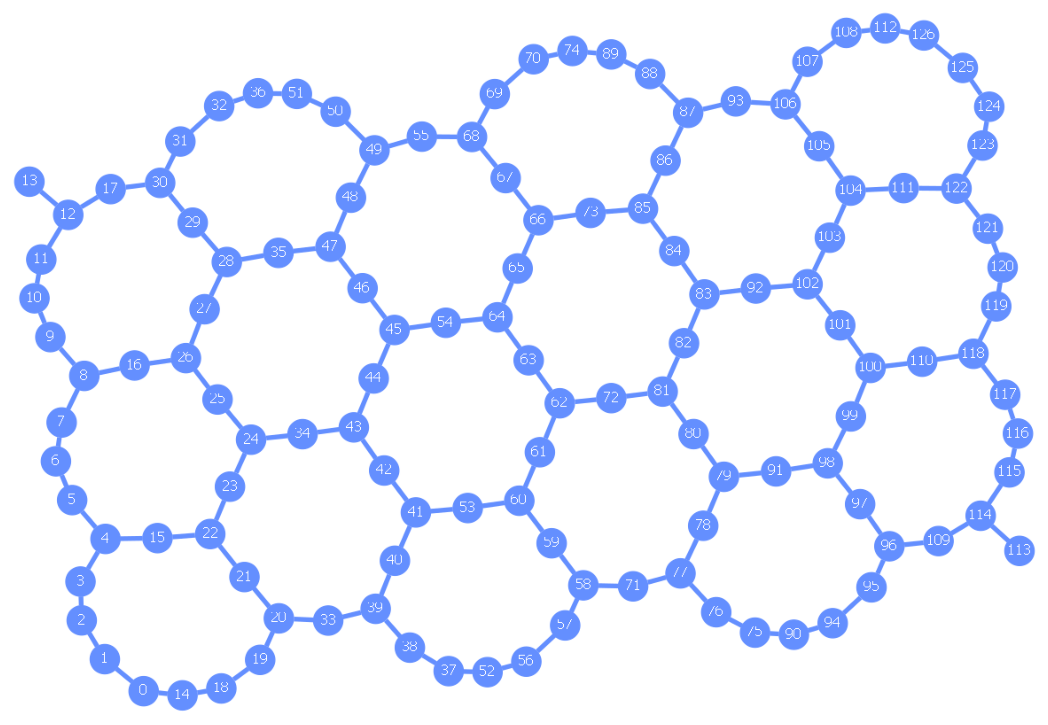

In [118]:
from qiskit.visualization import plot_coupling_map
plot_coupling_map(B.num_qubits, None, cmapB.get_edges())

In [119]:
from datetime import datetime, timezone
import pandas as pd

# Summary
# Edges (just pairs of qubits)
edgesA = cmapA.get_edges()
edgesB = cmapB.get_edges()

# Queue lengths
queueA = A.status().pending_jobs
queueB = B.status().pending_jobs
now_utc = datetime.now().strftime("%Y-%m-%d %H:%M:%S")


rows = [
    {
        "Device": "A",
        "Backend name": A.name,
        "Num qubits": A.num_qubits,
        "Basis (native) gates": ", ".join(cfgA.basis_gates),
        "Coupling map edges (#)": len(edgesA),
        "Queue length (pending_jobs)": queueA,
        "Captured (UTC)": now_utc,
    },
    {
        "Device": "B",
        "Backend name": B.name,
        "Num qubits": B.num_qubits,
        "Basis (native) gates": ", ".join(cfgB.basis_gates),
        "Coupling map edges (#)": len(edgesB),
        "Queue length (pending_jobs)": queueB,
        "Captured (UTC)": now_utc,
    },
]
df = pd.DataFrame(rows)
print("\033[1mSummary (A vs B)\033[0m")
print(df.to_string(index=False))

Summary (A vs B)
Device Backend name  Num qubits Basis (native) gates  Coupling map edges (#)  Queue length (pending_jobs)      Captured (UTC)
     A   ibm_torino         133    cz, id, rz, sx, x                     300                          637 2025-10-09 19:25:53
     B ibm_brisbane         127   ecr, id, rz, sx, x                     144                         3918 2025-10-09 19:25:53


# Task 2 — QRNG circuit construction

In [120]:
from qiskit import QuantumCircuit

# One‑bit QRNG
qc1 = QuantumCircuit(1)
qc1.h(0)          # coin‑flip on qubit 0
qc1.measure_all() # record the outcome as a classical bit
qc1.draw()

# k‑bit QRNG
def qrng(k: int):
    qc = QuantumCircuit(k)
    for q in range(k):
        qc.h(q)          # one coin‑flip per qubit
    qc.measure_all()
    return qc

k = 6
qc = qrng(k)
qc.draw()

┌───┐ ░ ┌─┐               
   q_0: ┤ H ├─░─┤M├───────────────
        ├───┤ ░ └╥┘┌─┐            
   q_1: ┤ H ├─░──╫─┤M├────────────
        ├───┤ ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├─░──╫──╫─┤M├─────────
        ├───┤ ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├─░──╫──╫──╫─┤M├──────
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
   q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║ └╥┘
meas: 6/═════════╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5

**Explanation of the three steps above in our own words:**
We can think of a quantum circuit as a set of horizontal lines (qubits) that all begin in the state 0. Applying a Hadamard gate (`h`) on each qubit is like flipping a fair coin, putting it into a 50-50 superposition of 0 and 1. Finally, the measure step collapses each qubit and records the outcome, giving you random classical bits that together form your quantum random number.


# Task 3 — Transpilation & ISA analysis

In [121]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pmA = generate_preset_pass_manager(optimization_level=3, backend=A)
isaA = pmA.run(qc)

pmB = generate_preset_pass_manager(optimization_level=3, backend=B)
isaB = pmB.run(qc)

print("A ops:", isaA.count_ops(), "depth:", isaA.depth())
print("B ops:", isaB.count_ops(), "depth:", isaB.depth())

# (Optional) See which physical qubits were chosen for your logical qubits 0..k-1
print("ISA A initial_index_layout:", isaA.layout.initial_index_layout())
print("ISA A routing_permutation: ", isaA.layout.routing_permutation())
print("ISA A final_index_layout:  ", isaA.layout.final_index_layout())
print("ISA B final_index_layout:  ", isaB.layout.final_index_layout())

# (Optional) Peek at the device’s native gate names (you don't need to know them yet)
print("A basis gates:", A.configuration().basis_gates)
print("B basis gates:", B.configuration().basis_gates)
# Draw the transpiled circuit
isaA.draw()

A ops: OrderedDict([('rz', 12), ('sx', 6), ('measure', 6), ('barrier', 1)]) depth: 4
B ops: OrderedDict([('rz', 12), ('sx', 6), ('measure', 6), ('barrier', 1)]) depth: 4
ISA A initial_index_layout: [37, 18, 36, 87, 117, 81, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
ISA A routing_permutation:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,

global phase: 3π/2
           ┌─────────┐┌────┐┌─────────┐ ░    ┌─┐            
 q_1 -> 18 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░────┤M├────────────
           ├─────────┤├────┤├─────────┤ ░    └╥┘┌─┐         
 q_2 -> 36 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─────╫─┤M├─────────
           ├─────────┤├────┤├─────────┤ ░ ┌─┐ ║ └╥┘         
 q_0 -> 37 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├─╫──╫──────────
           ├─────────┤├────┤├─────────┤ ░ └╥┘ ║  ║       ┌─┐
 q_5 -> 81 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫──╫───────┤M├
           ├─────────┤├────┤├─────────┤ ░  ║  ║  ║ ┌─┐   └╥┘
 q_3 -> 87 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫──╫─┤M├────╫─
           ├─────────┤├────┤├─────────┤ ░  ║  ║  ║ └╥┘┌─┐ ║ 
q_4 -> 117 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫──╫──╫─┤M├─╫─
           └─────────┘└────┘└─────────┘ ░  ║  ║  ║  ║ └╥┘ ║ 
   meas: 6/════════════════════════════════╩══╩══╩══╩══╩══╩═
                                           0  1  2  3  4  5

Both A and B show the same amount of instruction (12 + 6 + 6 + 1 = 25) and depth (4) counts, as seen on 'A ops' and 'B ops'.

The circuit shows no 2-qubit operations.

An interesting thing to note, is that the order of the logical qubits is changed due to the mapping to physical qubits (idx 18, 37, 55, 66, 87, 131); however, they all collapse in their respective order. The Coupling map and indexes shows the physical qubits are not clustered.

The initial_index_layout gets an ordered list of indexes, but shuffles the first 6 values, the routing_permutation consists of an ordered list which maps the first values directly to final_index.



---

# Task 4 — Execute (simulator and hardware)



In [122]:
from qiskit_ibm_runtime import SamplerV2 as Sampler


# Hardware: target a specific backend
sampler = Sampler(mode=A) # or mode=B
result = sampler.run([isaA], shots=4000).result()
counts = result[0].data.meas.get_counts() # {'010011': n, ...}
total = sum(counts.values())
probs = {bitstr: count / total for bitstr, count in counts.items()}

# Simulator with the same result schema
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
sim_counts = BackendSamplerV2(backend=AerSimulator()).run([isaA], shots=4000).result()[0].data.meas.get_counts()

In [123]:
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
# After you run each backend:
resultA = Sampler(mode=A).run([isaA], shots=4000).result()
resultB = Sampler(mode=B).run([isaB], shots=4000).result()
sim_res = BackendSamplerV2(backend=AerSimulator()).run([isaA], shots=4000).result()

bitstringsA  = resultA[0].data.meas.get_bitstrings()
bitstringsB  = resultB[0].data.meas.get_bitstrings()
bitstringsSim = sim_res[0].data.meas.get_bitstrings()

countsA = resultA[0].data.meas.get_counts()
countsB = resultB[0].data.meas.get_counts()
sim_counts = sim_res[0].data.meas.get_counts()


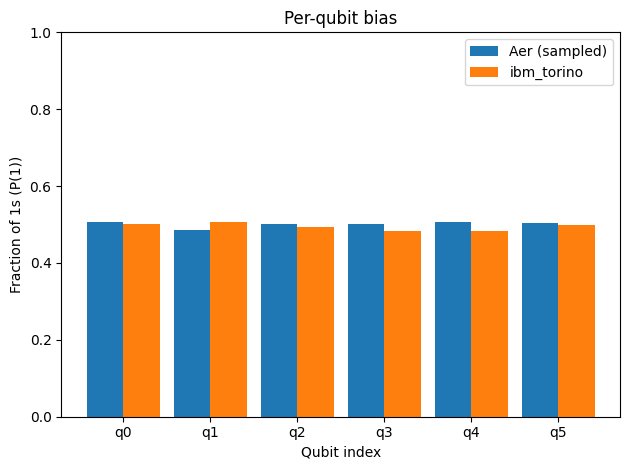

sim_counts    counts_A   counts_B
0.50775     0.5015     0.5075
0.48475     0.50625     0.50925
0.501     0.4935     0.51475
0.50075     0.482     0.488
0.50675     0.4825     0.5355
0.504     0.4985     0.498


In [124]:
import numpy as np, matplotlib.pyplot as plt

def per_qubit_p1(counts, n):
    shots = sum(counts.values())
    p = np.zeros(n, dtype=float)
    for s, c in counts.items():                 # s like '0101' (qubit 0 is rightmost)
        for j, ch in enumerate(reversed(s)):    # map column 0 -> qubit 0
            if ch == '1':
                p[j] += c
    return p / max(shots, 1)

k = qc.num_qubits  # or isaA.num_qubits
p_sim = per_qubit_p1(sim_counts, k)
p_A   = per_qubit_p1(countsA,    k)
p_B   = per_qubit_p1(countsB,    k)

x = np.arange(k); w = 0.42
plt.figure()
plt.bar(x - w/2, p_sim, width=w, label="Aer (sampled)")
plt.bar(x + w/2, p_A,   width=w, label=A.name)
plt.xlabel("Qubit index"); plt.ylabel("Fraction of 1s (P(1))"); plt.title("Per-qubit bias")
plt.xticks(x, [f"q{j}" for j in range(k)]); plt.ylim(0, 1); plt.legend(); plt.tight_layout(); plt.show()

sim_count = sum(1 for v in p_sim if v > 0.5)

print("sim_counts    counts_A   counts_B")

for i in range(len(p_sim)):
  print(p_sim[i], "   ", p_A[i], "   ", p_B[i])



# Bonus Task — Statistical assessment of randomness

## B.1 Monobit bias (per qubit and overall)


In [125]:
import numpy as np

def monobit_summary_from_counts(counts, k):
    import numpy as np
    shots = sum(counts.values())
    # Build per-shot matrix by expanding counts (order doesn’t matter for mean)
    bitstrings = []
    for s, c in counts.items():
        bitstrings.extend([s] * c)
    M = np.array([[int(b) for b in s[::-1]] for s in bitstrings], dtype=int)
    p = M.mean(axis=0)
    overall = float(p.mean())
    se = np.sqrt(0.25 / shots)
    suspect = np.abs(p - 0.5) > 3 * se
    return p, overall, se, suspect


# B.1
pA, overallA, seA, flagA = monobit_summary_from_counts(countsA, k)
pB, overallB, seB, flagB = monobit_summary_from_counts(countsB, k)
pS, overallS, seS, flagS = monobit_summary_from_counts(sim_counts, k)

print("A per-qubit P(1):", np.round(pA, 8), "overall:", round(overallA, 8), "SE~", round(seA, 8))
print("A suspect qubits:", np.where(flagA)[0].tolist())
print("B per-qubit P(1):", np.round(pB, 8), "overall:", round(overallB, 8), "SE~", round(seB, 8))
print("B suspect qubits:", np.where(flagB)[0].tolist())
print("Sim per-qubit P(1):", np.round(p_sim, 3), "overall:", round(overallS, 3), "SE~", round(seS, 4))
print("Sim suspect qubits:", np.where(flagS)[0].tolist())

A per-qubit P(1): [0.5015  0.50625 0.4935  0.482   0.4825  0.4985 ] overall: 0.49404167 SE~ 0.00790569
A suspect qubits: []
B per-qubit P(1): [0.5075  0.50925 0.51475 0.488   0.5355  0.498  ] overall: 0.50883333 SE~ 0.00790569
B suspect qubits: [4]
Sim per-qubit P(1): [0.508 0.485 0.501 0.501 0.507 0.504] overall: 0.501 SE~ 0.0079
Sim suspect qubits: []


## B.2 Runs test (temporal alternation)

In [126]:
import numpy as np

def runs_fraction_per_qubit_from_bitstrings(bitstrings, k):
    M = np.array([[int(b) for b in s[::-1]] for s in bitstrings], dtype=int)
    return (M[1:] != M[:-1]).mean(axis=0)


# B.2
flipsA  = runs_fraction_per_qubit_from_bitstrings(bitstringsA,  k)
flipsB  = runs_fraction_per_qubit_from_bitstrings(bitstringsB,  k)
flipsS  = runs_fraction_per_qubit_from_bitstrings(bitstringsSim, k)
print("A runs (flip fraction) per qubit:", np.round(flipsA, 3))
print("B runs (flip fraction) per qubit:", np.round(flipsB, 3))
print("Sim runs (flip fraction) per qubit:", np.round(flipsS, 3))

A runs (flip fraction) per qubit: [0.497 0.515 0.486 0.509 0.503 0.507]
B runs (flip fraction) per qubit: [0.502 0.494 0.484 0.508 0.503 0.492]
Sim runs (flip fraction) per qubit: [0.51  0.496 0.517 0.495 0.501 0.494]


## B.3 Lag‑1 autocorrelation (temporal dependence)

In [127]:
import numpy as np


def autocorr_lag1_from_bitstrings(bitstrings, k):
    M = np.array([[int(b) for b in s[::-1]] for s in bitstrings], dtype=int)
    X = M - M.mean(axis=0, keepdims=True)
    num = (X[:-1] * X[1:]).sum(axis=0)
    den = (X * X).sum(axis=0)
    return np.divide(num, den, out=np.zeros_like(num, dtype=float), where=den!=0)

# B.3
ac1A    = autocorr_lag1_from_bitstrings(bitstringsA,  k)
ac1B    = autocorr_lag1_from_bitstrings(bitstringsB,  k)
ac1S    = autocorr_lag1_from_bitstrings(bitstringsSim, k)
print("A lag-1 autocorr per qubit:", np.round(ac1A, 3))
print("B lag-1 autocorr per qubit:", np.round(ac1B, 3))
print("Sim lag-1 autocorr per qubit:", np.round(ac1S, 3))

A lag-1 autocorr per qubit: [ 0.006 -0.03   0.029 -0.02  -0.006 -0.014]
B lag-1 autocorr per qubit: [-0.004  0.012  0.031 -0.016 -0.011  0.016]
Sim lag-1 autocorr per qubit: [-0.02   0.007 -0.033  0.009 -0.003  0.012]


## B.4 Inter‑qubit correlation (spatial dependence)

In [128]:
import numpy as np
import itertools

def interqubit_corr_from_bitstrings(bitstrings, k):
    import numpy as np, itertools
    M = np.array([[int(b) for b in s[::-1]] for s in bitstrings], dtype=int)
    X = M - M.mean(axis=0, keepdims=True)
    cov = (X.T @ X) / (len(M) - 1)
    std = X.std(axis=0, ddof=1)
    R = cov / (std[:, None] * std[None, :])
    np.fill_diagonal(R, 1.0)
    return R

# B.4
R_A     = interqubit_corr_from_bitstrings(bitstringsA,  k)
R_B     = interqubit_corr_from_bitstrings(bitstringsB,  k)
R_S     = interqubit_corr_from_bitstrings(bitstringsSim, k)

flagsA = [(i,j,float(R_A[i,j])) for i,j in itertools.combinations(range(k),2) if abs(R_A[i,j])>0.1]
print("A suspicious pairs:", flagsA[:10])
flagsB = [(i,j,float(R_B[i,j])) for i,j in itertools.combinations(range(k),2) if abs(R_B[i,j])>0.1]
print("B suspicious pairs:", flagsB[:10])
flagsS = [(i,j,float(R_S[i,j])) for i,j in itertools.combinations(range(k),2) if abs(R_S[i,j])>0.1]
print("Sim suspicious pairs:", flagsS[:10])

A suspicious pairs: []
B suspicious pairs: []
Sim suspicious pairs: []


## B.5 Interpretation

### B1:


### B2:

### B3:

### B4:


# AI Assistance Disclosure


## AI Assistance Disclosure

**Per-Task Usage:**  
- **Task 0:** NA.
- **Task 1:** ChatGPT provided comprehensive support and guidance in explaining the code, what it does and why.
- **Task 2:** NA.
- **Task 3:** ChatGPT provided guidance on concepts we did not fully grasp, such as how we could identify whether 2 qubit operations have appeared from the quantum circuit diagram.
- **Task 4:** NA.
- **Bonus:** NA.

**Validation:** AI outputs were tested in the notebook, adapted to match variable names and environment, and checked with documentation and sample data to ensure correctness.

**Prompts / Interactions:**

- **Task 1:**

Prompt:

"what is the point of this: from qiskit_aer.primitives import SamplerV2 as AerSampler from qiskit import QuantumCircuit bell = QuantumCircuit(2) bell.h(0) bell.cx(0, 1) bell.measure_all() sampler = AerSampler() job = sampler.run([bell]) print(job.result()[0].data.meas.get_counts()) image.png"

Answer:

"Ah! Let’s break this down carefully. The snippet you shared is using Qiskit Aer’s new “primitives” API (SamplerV2) to simulate a quantum circuit. Here’s what each part does:...

✅ The point of this code

Demonstrates creating and simulating a simple entangled state.

Uses SamplerV2, the new preferred simulator interface in Qiskit Aer.

Prints the measurement statistics of a quantum circuit."


- **Task 3:**

Prompt:

"how can I tell if 2 qubit operations appeared?"

Answer:

"[...] Look at the circuit diagram:

The diagram shows only single-qubit gates (Rz, √X) and measurements (M).

There are no connecting lines between qubits (like CNOT, CZ, or ECR would produce)."

